# síla závislá na dvou úhlech

In [382]:
import math as m
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
import numpy as np

%matplotlib widget

# code modified to change negative values to positive ones
def lmap(f,x):
    return list(map(f,x))

def lfilter(f,x):
    return list(filter(f,x))

In [383]:
#  y+
#  ^
#  |       / z+
#  |     /
#  |   /
#  | /
#  /----------> x+
#

mu_0 = 4 * m.pi * 1e-7
B_r = 1

# upper magnet

d_0 = 15 * 1e-3
h_0 = 2 * 1e-3
V_0 = 2 * m.pi * (d_0 / 2) ** 2 * h_0
k_0 = V_0 * B_r / mu_0  # remanence-volume coefficient of the smaller/upper magnet


def M_0(alpha):  # mag. moment vector
    return np.array([m.cos(alpha), m.sin(alpha), 0]) * k_0


# lower magnet

d_1 = 30 * 1e-3
h_1 = 5 * 1e-3
V_1 = 2 * m.pi * (d_1 / 2) ** 2 * h_1
k_1 = V_1 * B_r / mu_0  # remanence-volume coefficient of the larger/lower magnet


def M_1(phi):  # mag. moment vector
    return np.array([m.cos(phi), 0, m.sin(phi)]) * k_1


# relative position r
d_x = 5e-3
d_z = 5e-3
r_y = 42 * 1e-3


def R(d_x, d_z):  # position relation vector
    return np.array([d_x, r_y, d_z])


print(k_0, k_1, mu_0)
print(M_0(0), M_1(0), R(0, 0))
print(F(M_0(alpha), M_1(0), R(0, 0)))


def F(M1, M2, R):
    dot_m1_r = M1.dot(R)
    dot_m2_r = M2.dot(R)
    dot_m1_m2 = M1.dot(M2)
    dist = np.linalg.norm(R)

    return (
        (M2 * dot_m1_r)
        + (M1 * dot_m2_r)
        + (R * dot_m1_m2)
        - (R * (5 * dot_m1_r * dot_m2_r / (dist**2)))
    ) * (3 * mu_0 / (4 * m.pi * dist**5))
    
def tau(M1, M2, R):
    dist = np.linalg.norm(R)
    rhat = R * (1/dist)

    B = (rhat * 3 * (M1.dot(rhat)) - M1) * (mu_0 / (4*m.pi*dist**3))
    
    return np.cross(M2, B)
    
# gravity
density = 7400
Fg = density * V_0 * 9.81

0.5625 5.625 1.2566370614359173e-06
[0.5625 0.     0.    ] [5.625 0.    0.   ] [0.    0.042 0.   ]
[3.05048678e-01 1.86788443e-17 0.00000000e+00]


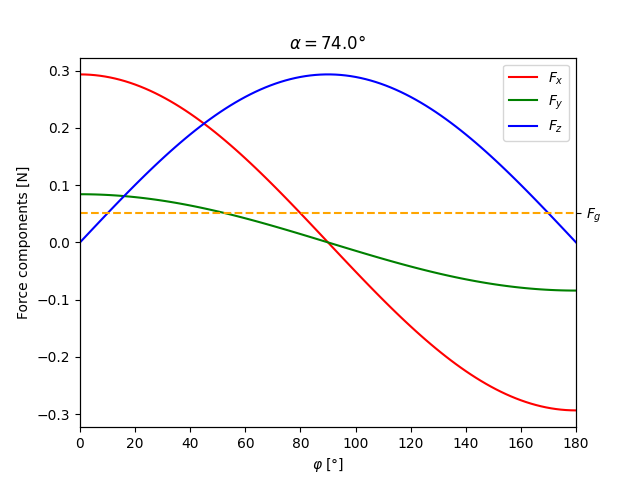

In [384]:
alpha = 74 * m.pi/180

phis = []
fx = []
fy = []
fz = []
for phi in np.linspace(0, m.pi, 100):
    f = F(M_0(alpha), M_1(phi), R(0, 0))
    
    phis.append(phi * 180/m.pi)
    fx.append(f[0])
    fy.append(f[1])
    fz.append(f[2])
    
plt.plot(phis, fx, "r", label = "$F_x$")
plt.plot(phis, fy, "g", label = "$F_y$")
plt.plot(phis, fz, "b", label = "$F_z$")

plt.xlabel("$\\varphi$ [°]")
plt.xlim(0,180, 30)

plt.ylabel("Force components [N]")
plt.title(f"$\\alpha = {alpha * 180/m.pi :.1f}°$")
plt.legend()

# plt.axhline(min(fy), color="g", linestyle=":")
# plt.axhline(max(fy), color="g", linestyle=":")

plt.axhline(Fg, color="orange", linestyle="--")
ylims = plt.gca().get_ylim()

ax2 = plt.gca().twinx()
ax2.set_ylim(ylims)
ax2.tick_params(axis='both')
# ax2.set_yticks([min(fy), Fg, max(fy)], labels = [f"{min(fy):.3f}", "$F_g$", f"{max(fy):.3f}"])
ax2.set_yticks([Fg], labels = ["$F_g$"])

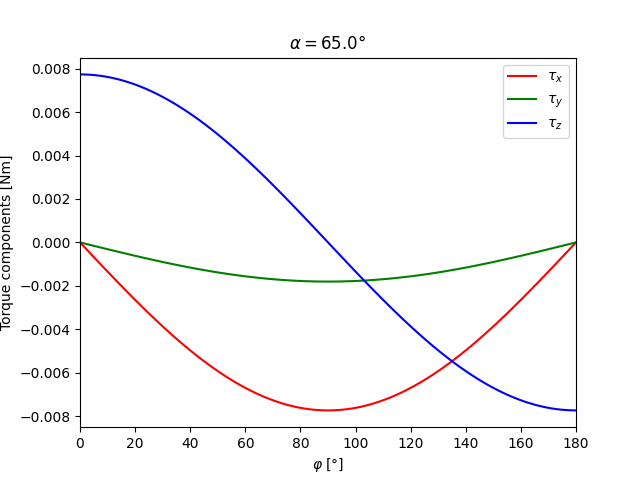

In [385]:
plt.figure()
alpha = 65 * m.pi/180

phis = []
fx = []
fy = []
fz = []
for phi in np.linspace(0, m.pi, 100):
    f = tau(M_0(alpha), M_1(phi), R(0, 0))
    
    phis.append(phi * 180/m.pi)
    fx.append(f[0])
    fy.append(f[1])
    fz.append(f[2])
    
plt.plot(phis, fx, "r", label = "$\\tau_x$")
plt.plot(phis, fy, "g", label = "$\\tau_y$")
plt.plot(phis, fz, "b", label = "$\\tau_z$")

plt.xlabel("$\\varphi$ [°]")
plt.xlim(0,180, 30)

plt.ylabel("Torque components [Nm]")
plt.title(f"$\\alpha = {alpha * 180/m.pi :.1f}°$")
plt.legend()

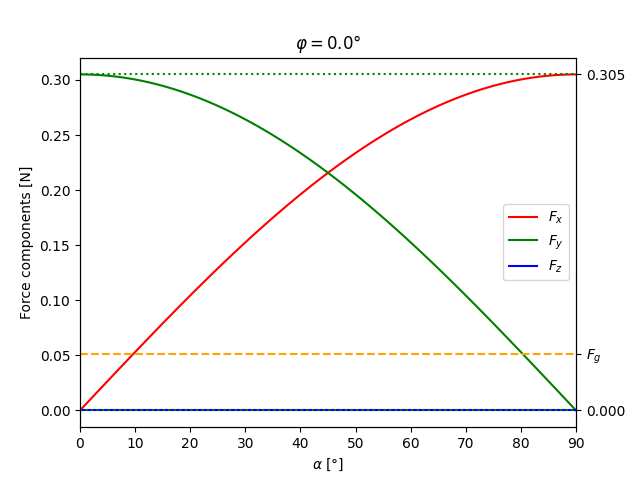

In [386]:
plt.figure()

phi = 0

alphas = []
fx = []
fy = []
fz = []
for alpha in np.linspace(0, m.pi/2, 100):
    f = F(M_0(alpha), M_1(phi), R(0, 0))
    
    alphas.append(alpha * 180/m.pi)
    fx.append(f[0])
    fy.append(f[1])
    fz.append(f[2])
    
plt.plot(alphas, fx, "r", label = "$F_x$")
plt.plot(alphas, fy, "g", label = "$F_y$")
plt.plot(alphas, fz, "b", label = "$F_z$")

plt.xlabel("$\\alpha$ [°]")
plt.xlim(0,90, 15)

plt.ylabel("Force components [N]")
plt.title(f"$\\varphi = {phi * 180/m.pi :.1f}°$")
plt.legend()

plt.axhline(min(fy), color="g", linestyle=":")
plt.axhline(max(fy), color="g", linestyle=":")

plt.axhline(Fg, color="orange", linestyle="--")
ylims = plt.gca().get_ylim()

ax2 = plt.gca().twinx()
ax2.set_ylim(ylims)
ax2.tick_params(axis='both')
ax2.set_yticks([min(fy), Fg, max(fy)], labels = [f"{min(fy):.3f}", "$F_g$", f"{max(fy):.3f}"])

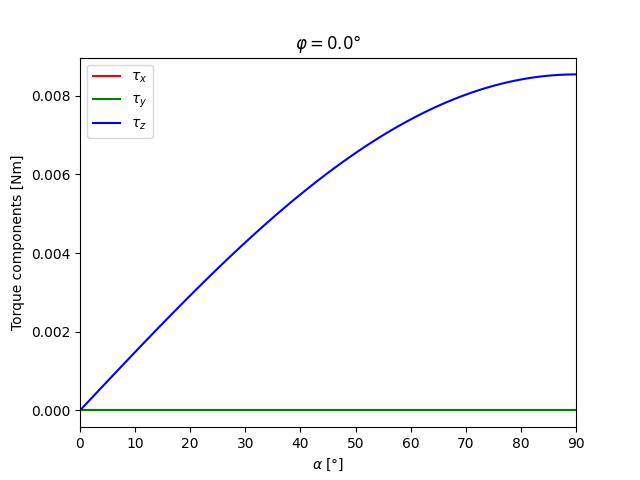

In [387]:
plt.figure()

phi = 0

alphas = []
fx = []
fy = []
fz = []
for alpha in np.linspace(0, m.pi/2, 100):
    f = tau(M_0(alpha), M_1(phi), R(0, 0))
    
    alphas.append(alpha * 180/m.pi)
    fx.append(f[0])
    fy.append(f[1])
    fz.append(f[2])
    
plt.plot(alphas, fx, "r", label = "$\\tau_x$")
plt.plot(alphas, fy, "g", label = "$\\tau_y$")
plt.plot(alphas, fz, "b", label = "$\\tau_z$")

plt.xlabel("$\\alpha$ [°]")
plt.xlim(0,90, 15)

plt.ylabel("Torque components [Nm]")
plt.title(f"$\\varphi = {phi * 180/m.pi :.1f}°$")
plt.legend()

[[5.62500000e-01 0.00000000e+00 0.00000000e+00 ... 3.44431912e-17
  5.62500000e-01 0.00000000e+00]
 [5.62500000e-01 0.00000000e+00 0.00000000e+00 ... 3.44431912e-17
  5.62500000e-01 0.00000000e+00]
 [5.62500000e-01 0.00000000e+00 0.00000000e+00 ... 3.44431912e-17
  5.62500000e-01 0.00000000e+00]
 ...
 [5.62500000e-01 0.00000000e+00 0.00000000e+00 ... 3.44431912e-17
  5.62500000e-01 0.00000000e+00]
 [5.62500000e-01 0.00000000e+00 0.00000000e+00 ... 3.44431912e-17
  5.62500000e-01 0.00000000e+00]
 [5.62500000e-01 0.00000000e+00 0.00000000e+00 ... 3.44431912e-17
  5.62500000e-01 0.00000000e+00]] [[ 5.62500000e+00  5.62500000e+00  5.62500000e+00 ...  5.62500000e+00
   5.62500000e+00  5.62500000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-5.62500000e+00 -5.62500000e+00 -5.62500000e+00 ... -5.62500000e+00
  -5.62500

NameError: name '_F' is not defined

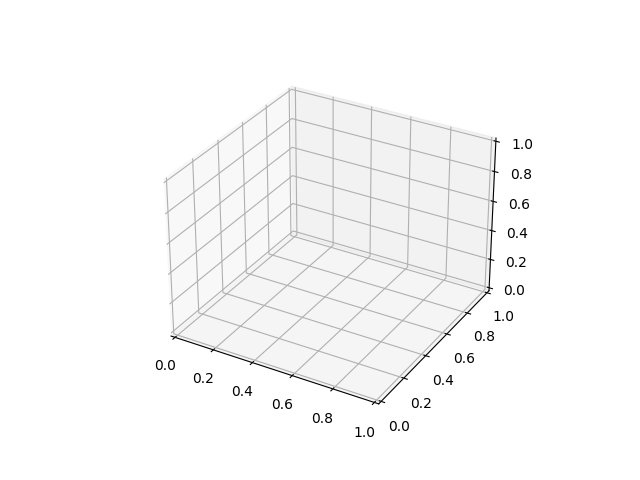

In [388]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
P = np.linspace(0, m.pi, 100)
A = np.linspace(0, m.pi/2, 100)
X, Y = np.meshgrid(lmap(lambda a: M_0(a), A), lmap(lambda p: M_1(p), P))
# _F = F(A, P, R(0, 0))

print(X, Y)
# Plot the surface.
surf = ax.plot_surface(A,P,_F, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()